In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Now search for the dataset
if os.path.exists("data.csv"):
    print('Dataset Found!')
else:
    print('Dataset not found. Now changing cwd to search for it.(will return back here if found in dataset folder)')
    os.chdir(str(Path(os.getcwd()).parent) + '\dataset')

# Loading Dataset into Dataframe
df = pd.read_csv("data.csv")

# cleaning Extra Columns
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

# Mapping values of Diagnosis
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Checking Null and Missing Values
print("\nNull Values:\n", df.isnull().sum())
print("\nMissing Values:\n", df.isna().sum())

# Extracting Mean, Squared Error and Worst Features with Diagnosis
df_mean = df[df.columns[:11]]
df_se = df.drop(df.columns[1:11], axis=1);
df_se = df_se.drop(df_se.columns[11:], axis=1)
df_worst = df.drop(df.columns[1:21], axis=1)

Dataset Found!

Null Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Missing Values:
 diagnosis                  0
radius_mean

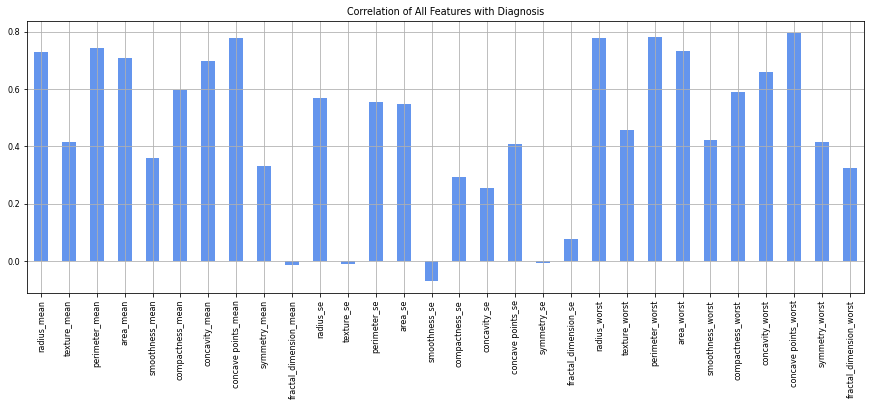

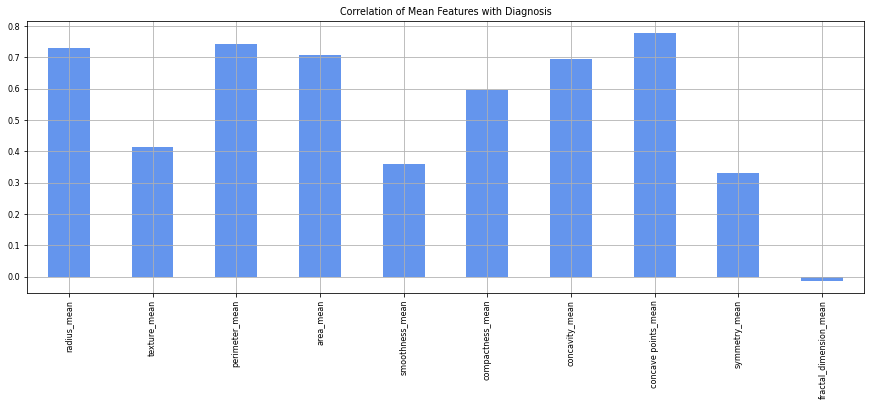

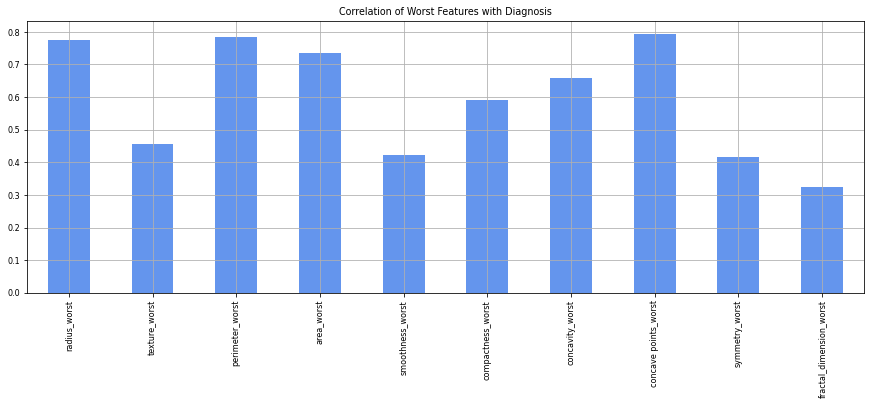

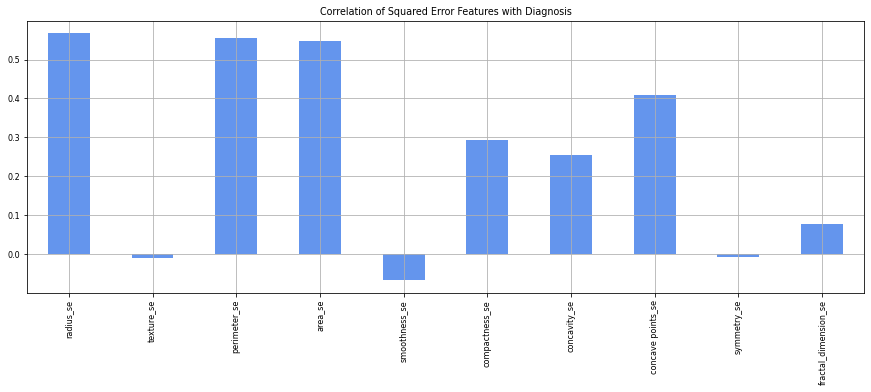

In [118]:
def corrwithdia(dfx):
    import matplotlib.pyplot as plt
    name = str([x for x in globals() if globals()[x] is dfx][0])
    if name == 'df':
        x = "All"
    elif name == 'df_mean':
        x = "Mean"
    elif name == 'df_se':
        x = "Squared Error"
    elif name == 'df_worst':
        x = "Worst"
    plt.figure(figsize=(15, 5))
    dfx.drop('diagnosis', axis=1).corrwith(dfx.diagnosis).plot(kind='bar', grid=True, title="Correlation of {} Features with Diagnosis".format(x), color="cornflowerblue");
for i in df, df_mean, df_worst, df_se:
    corrwithdia(i)

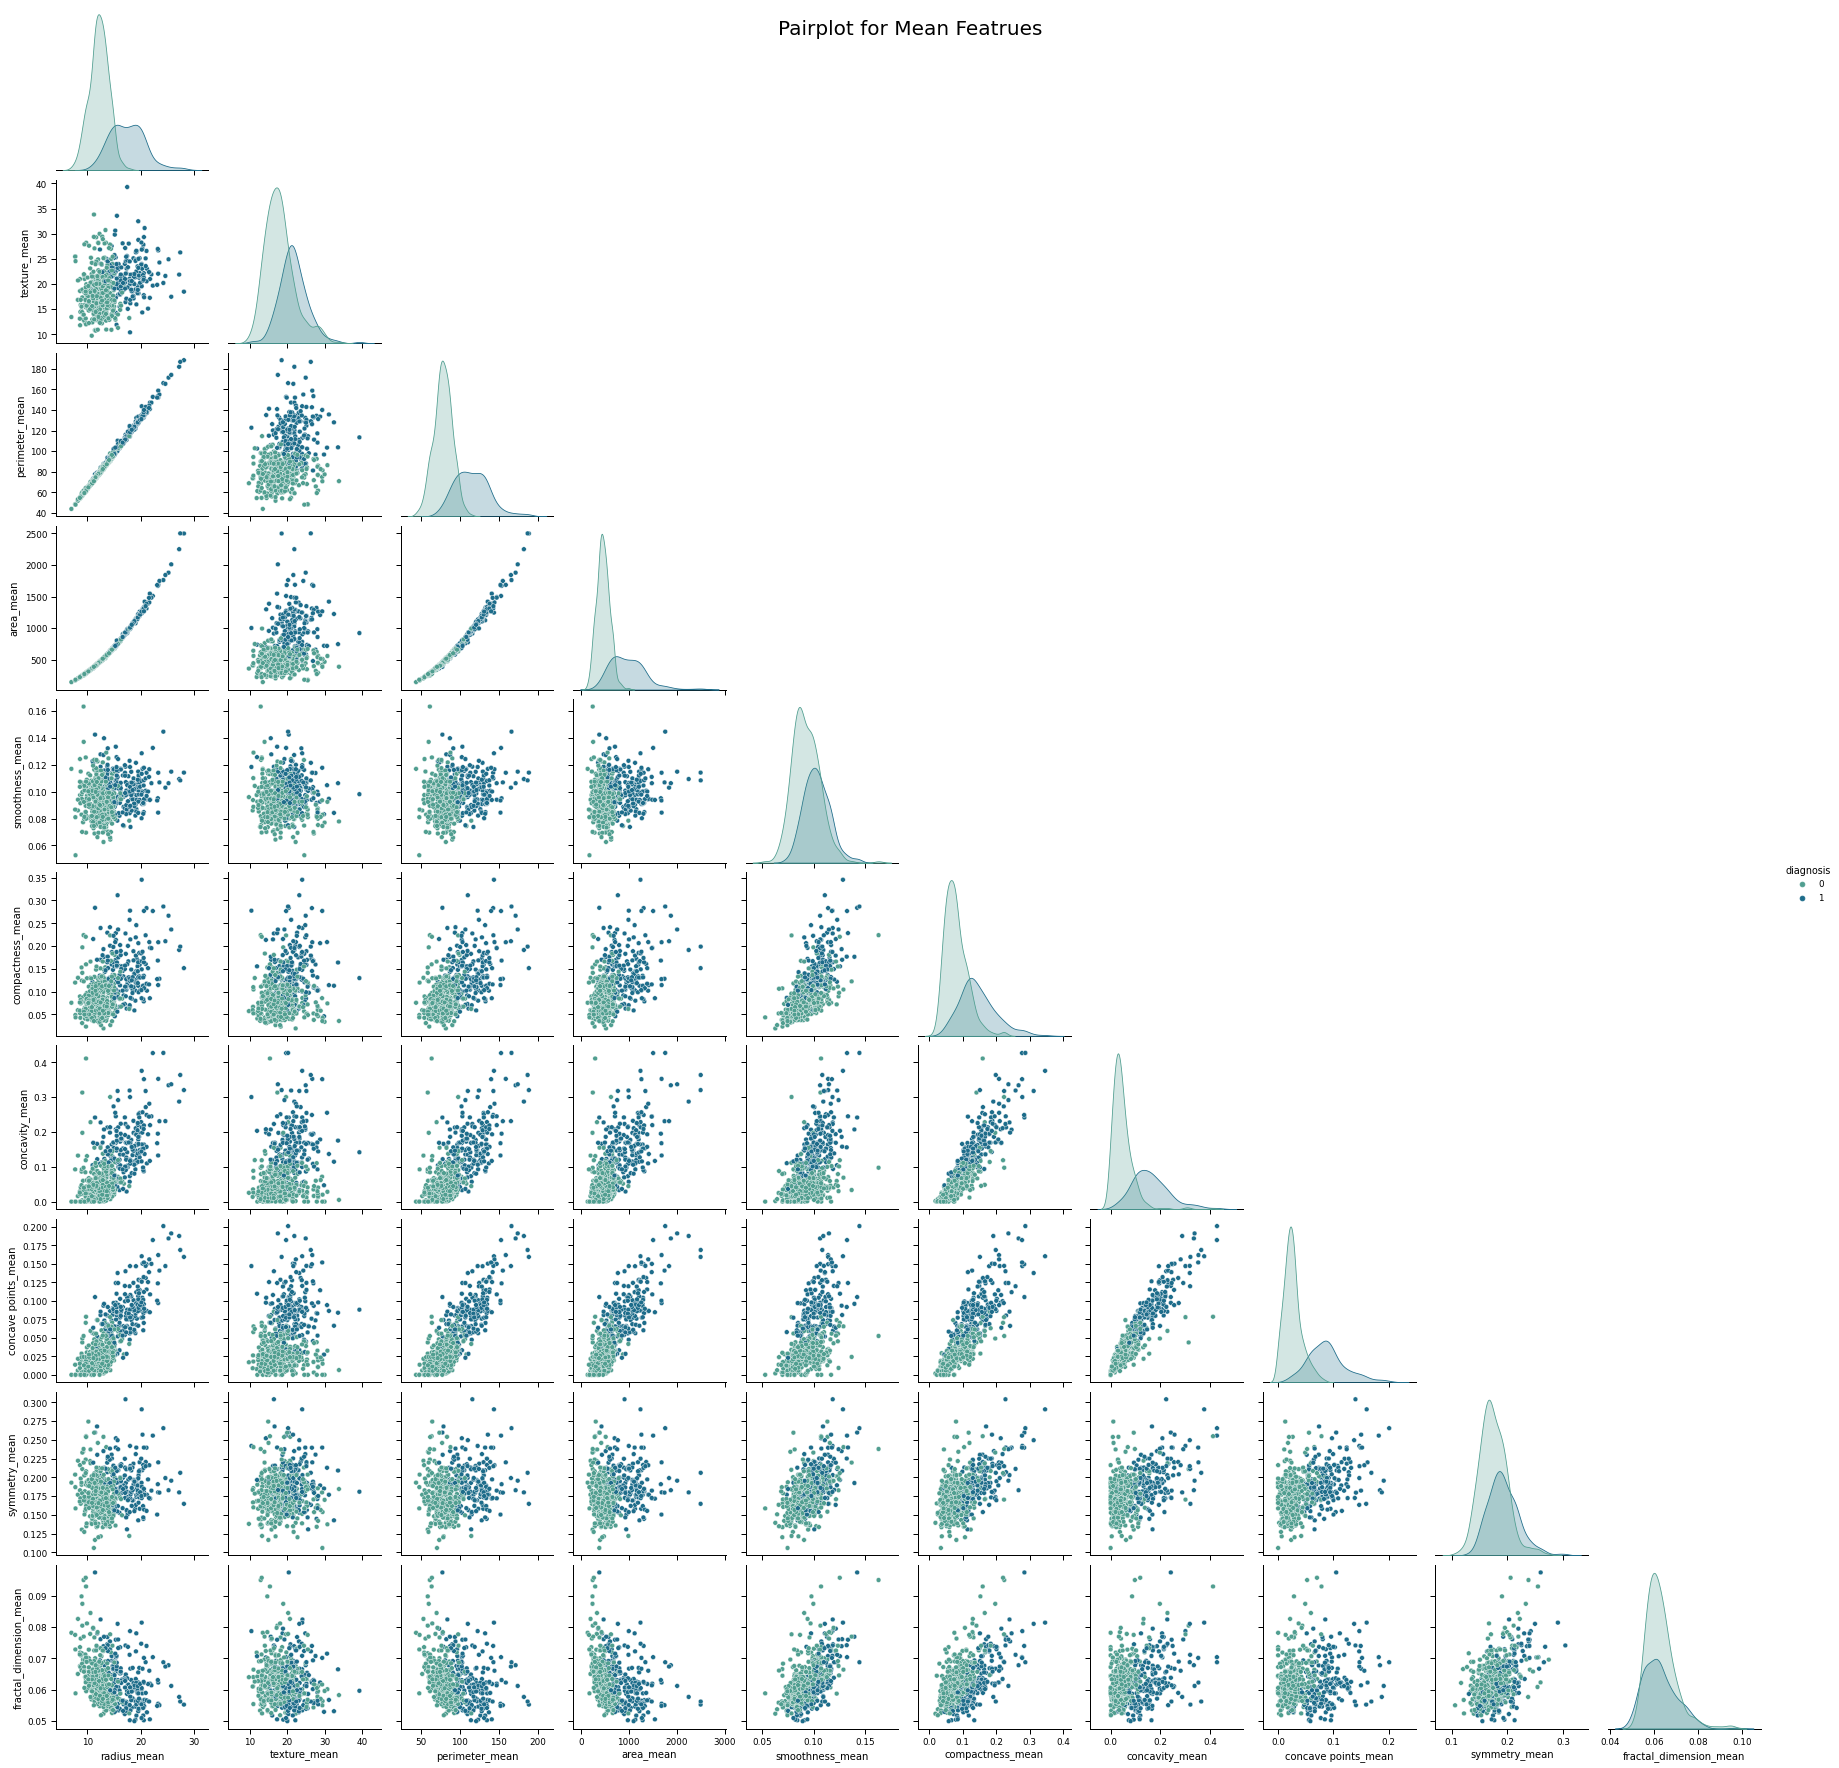

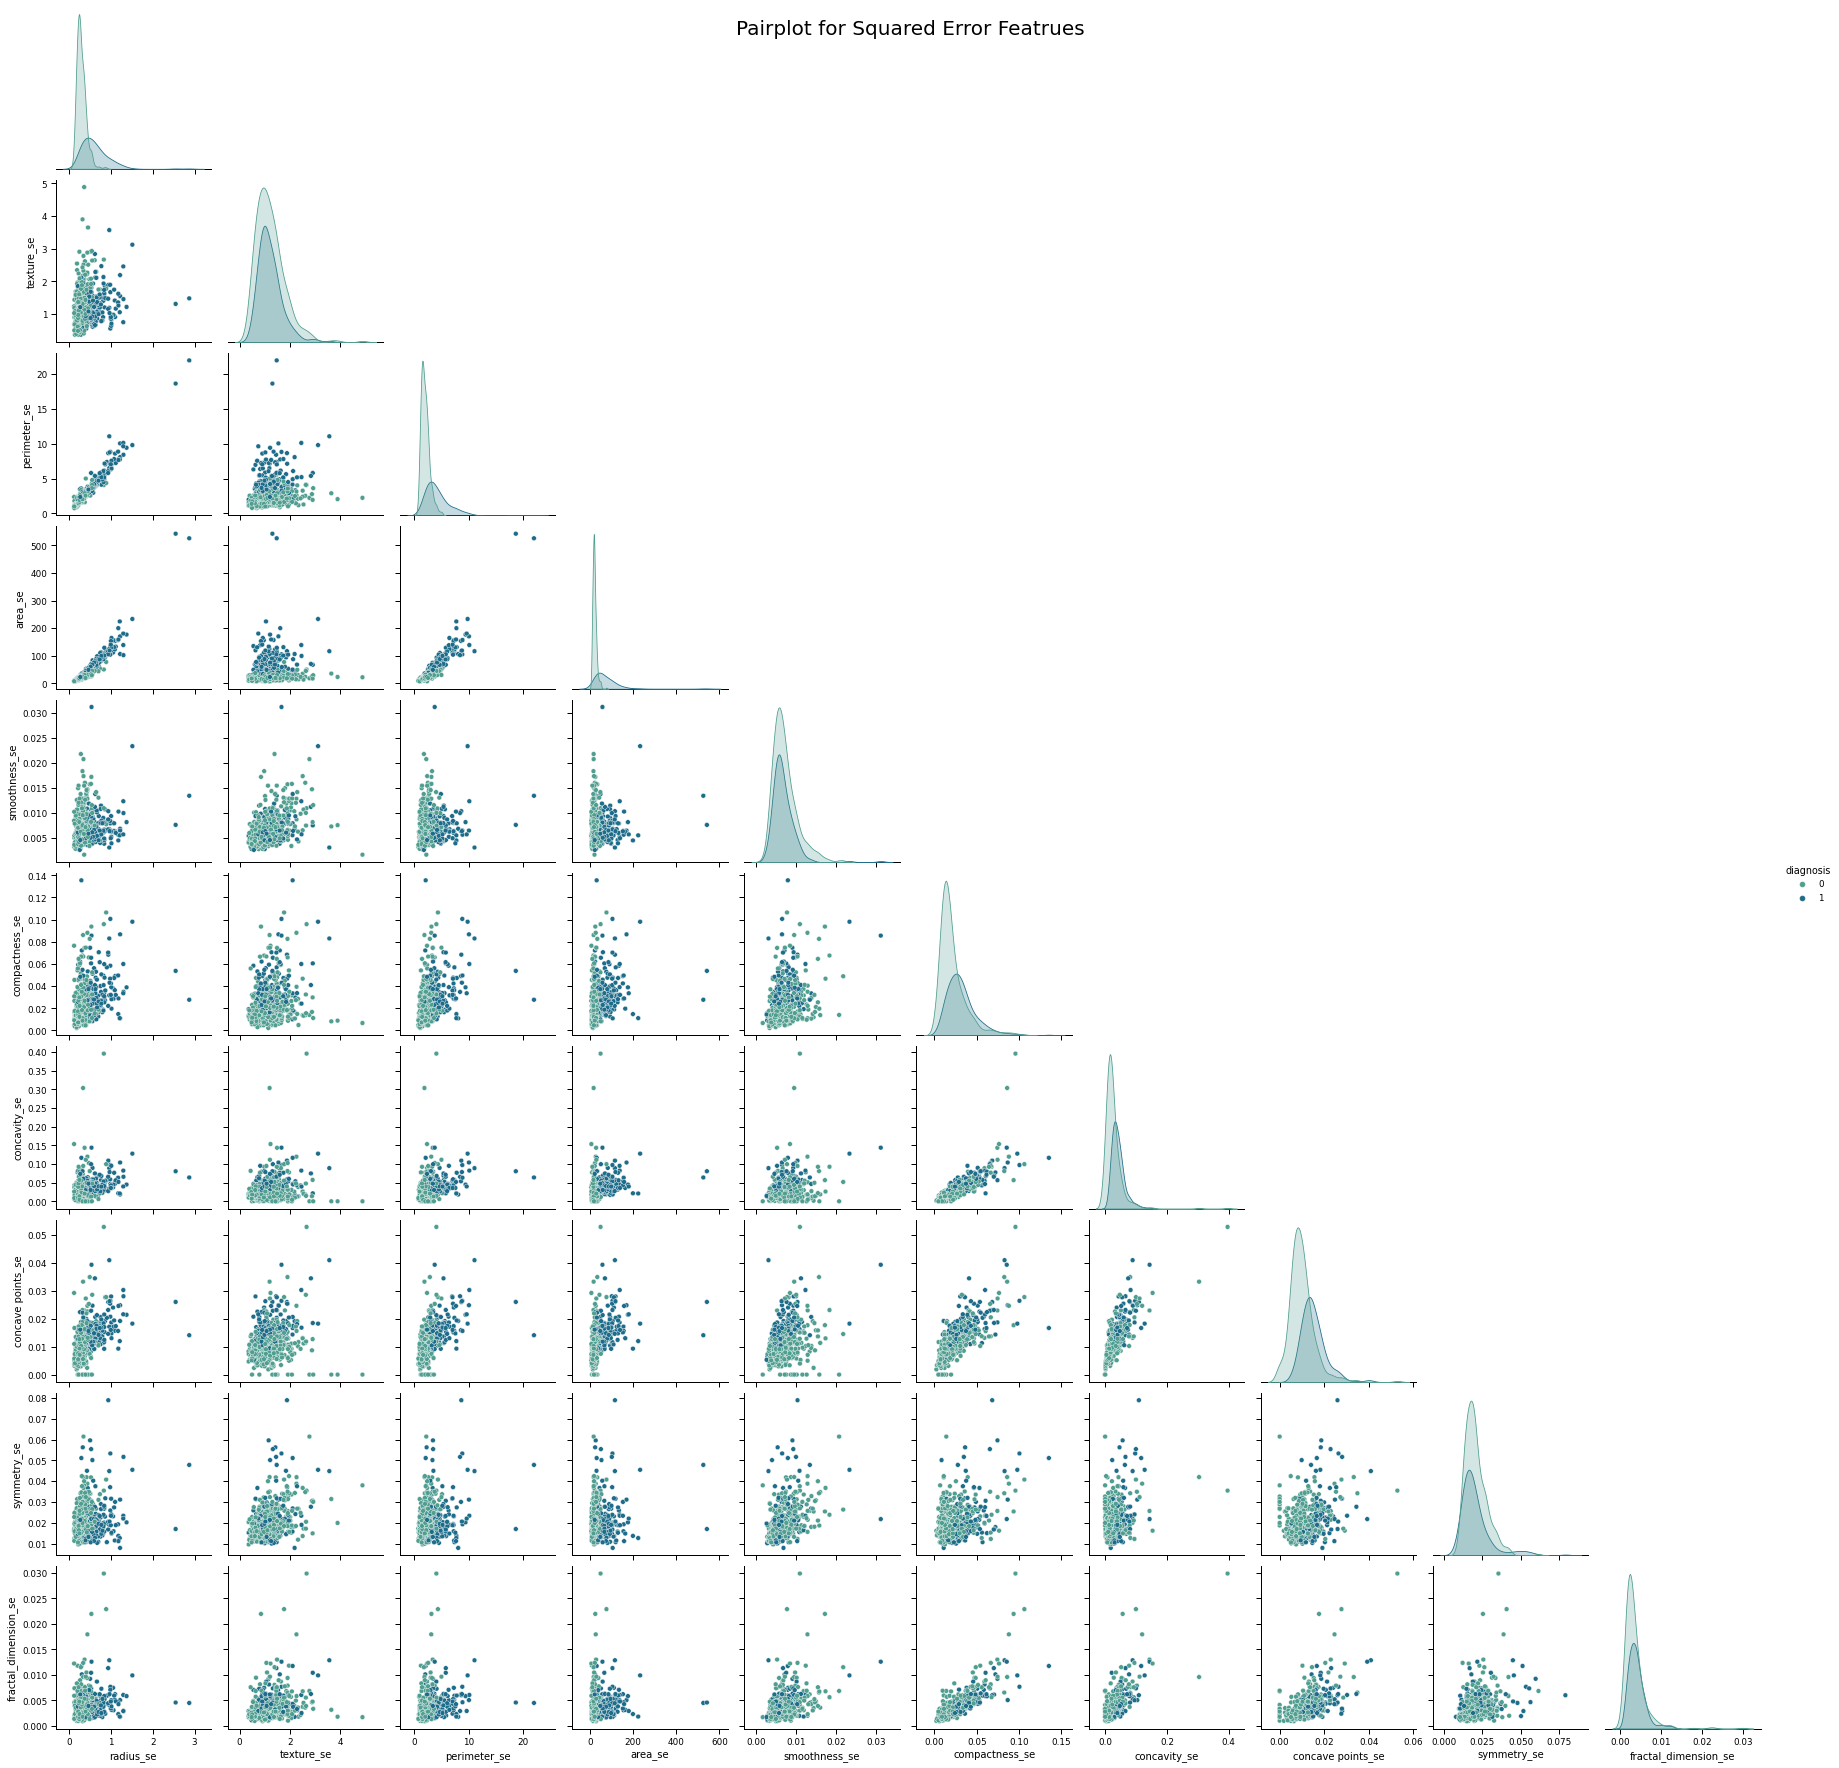

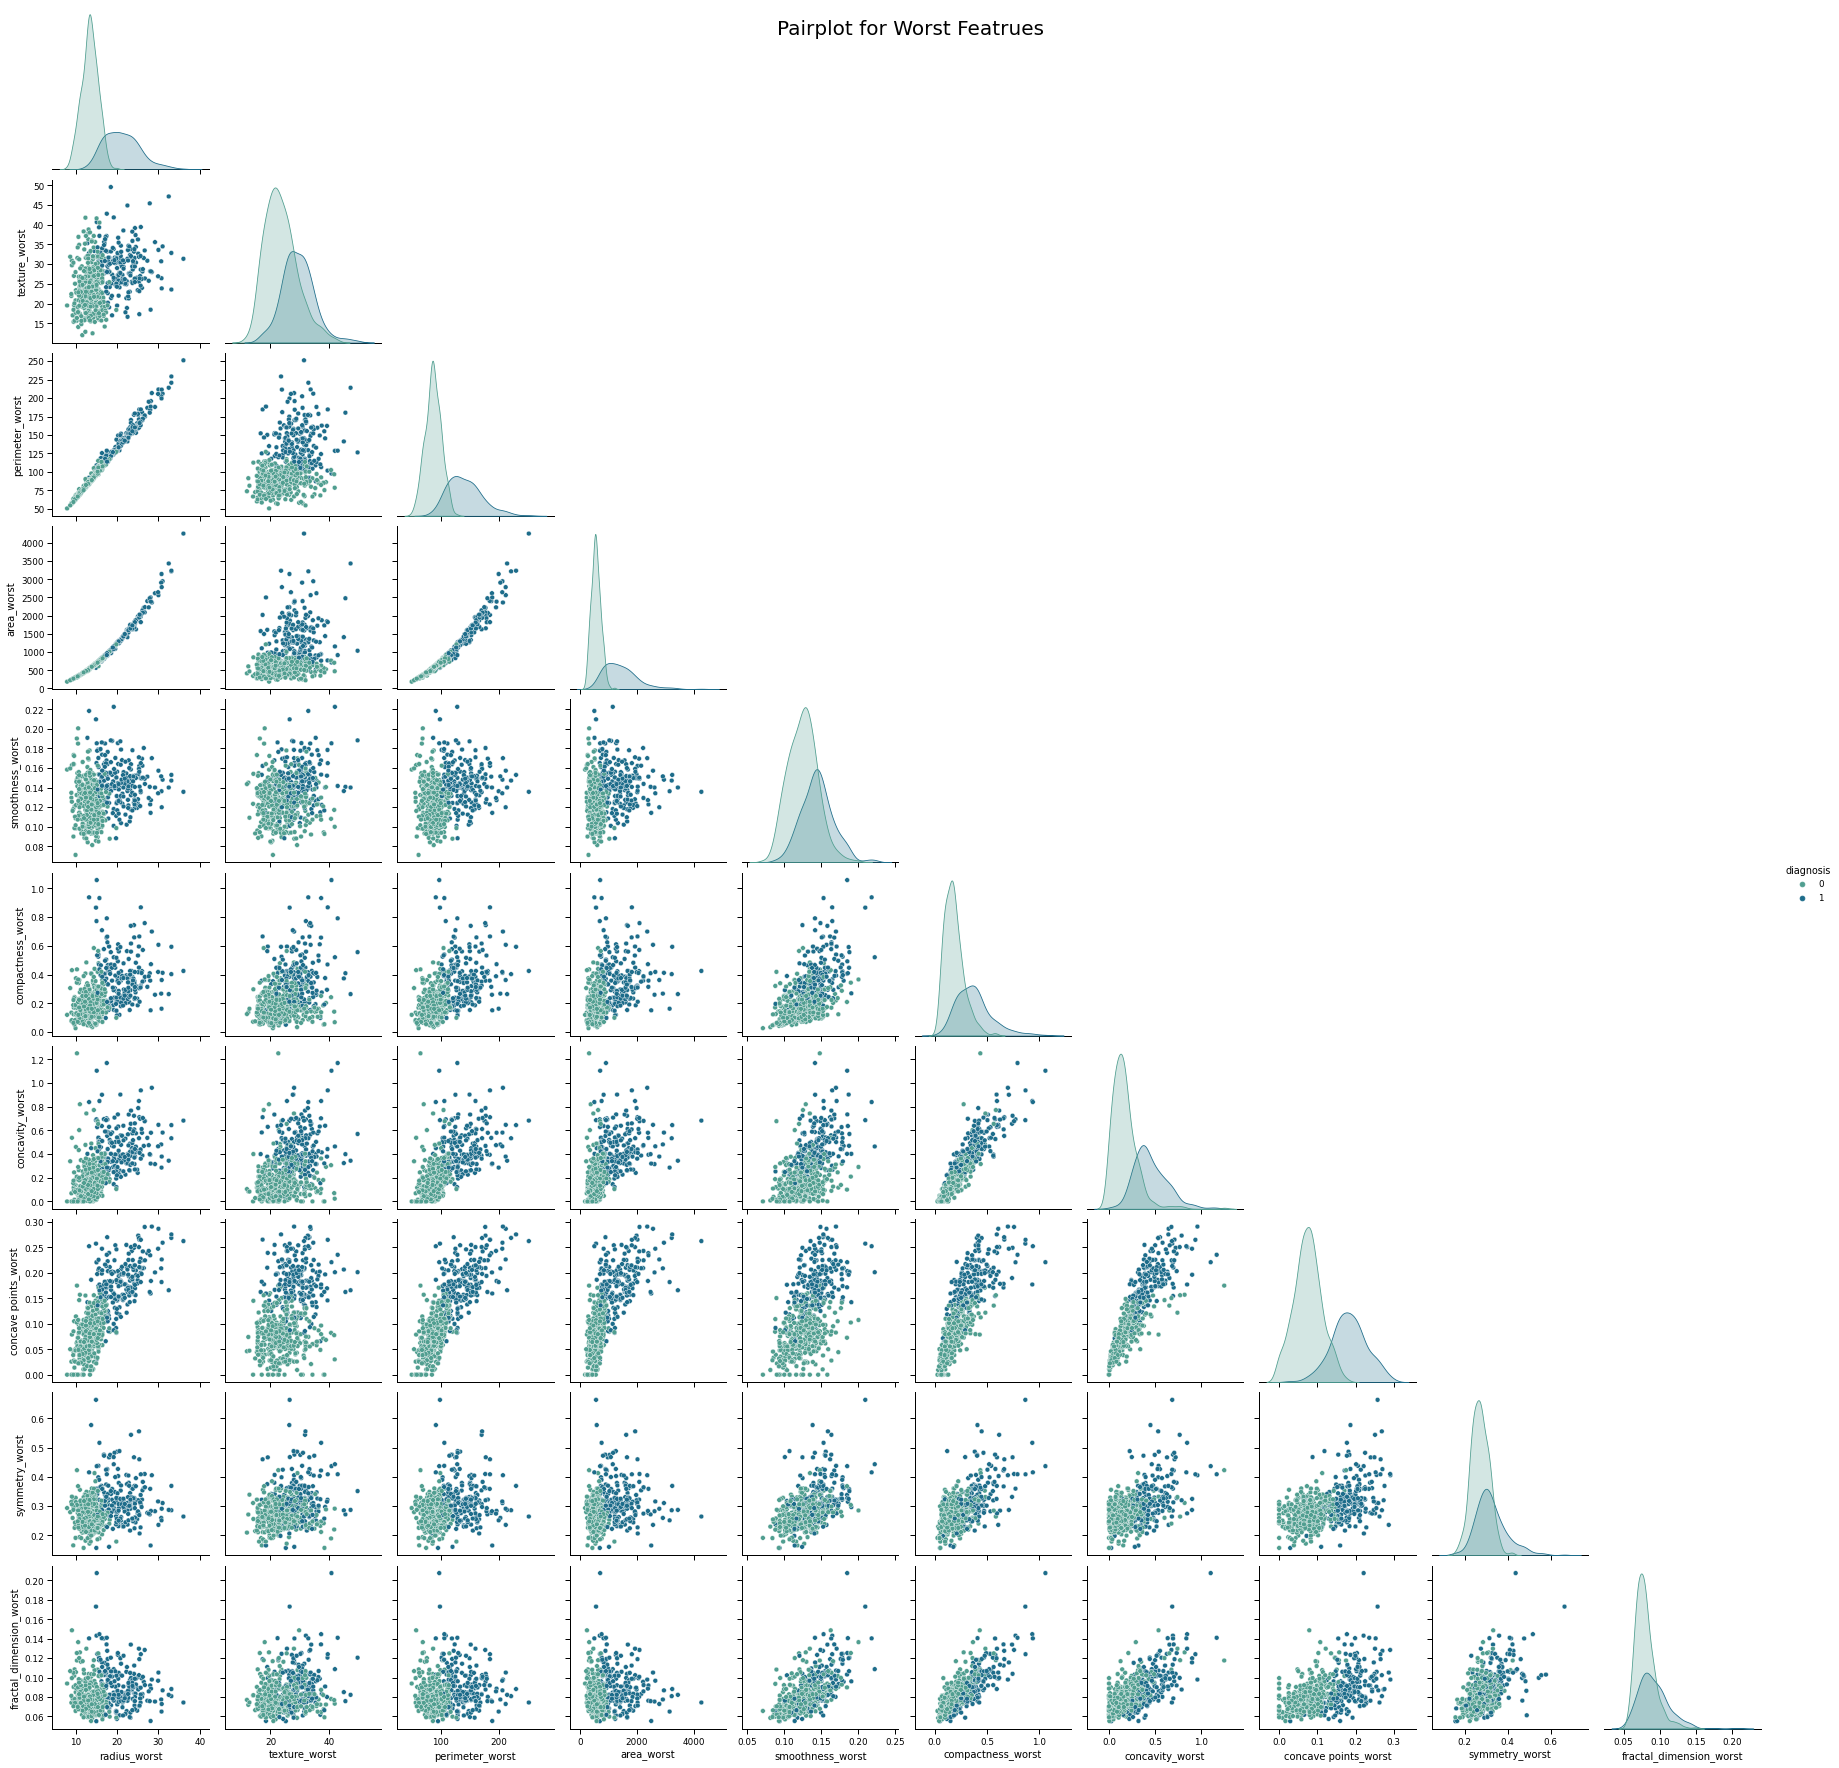

In [129]:
def pairplot(dfx):
    import seaborn as sns
    name = str([x for x in globals() if globals()[x] is dfx][0])
    if name == 'df_mean':
        x = "Mean"
    elif name == 'df_se':
        x = "Squared Error"
    elif name == 'df_worst':
        x = "Worst"
    sns.pairplot(data=dfx, hue='diagnosis', palette='crest', corner=True).fig.suptitle('Pairplot for {} Featrues'.format(x), fontsize = 20)
for i in df_mean, df_se, df_worst:
    pairplot(i)

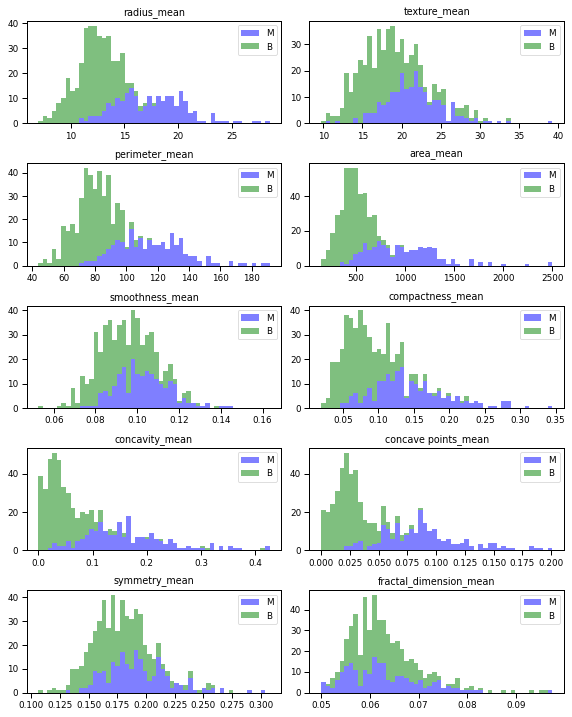

IndexError: list index out of range

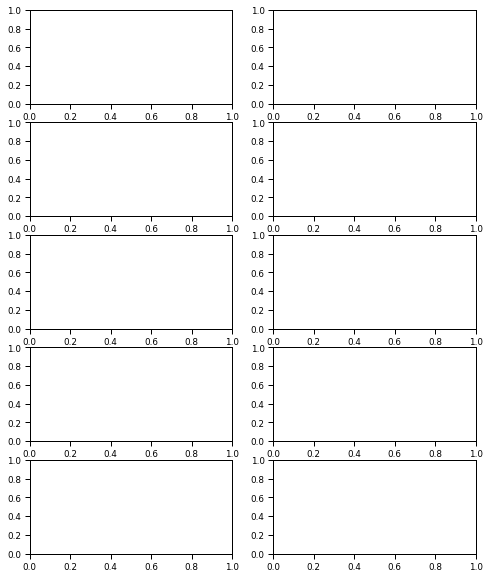

In [142]:
def distwithdia(dfx):
    import numpy as np
    import matplotlib.pyplot as plt
    name = str([x for x in globals() if globals()[x] is dfx][0])
    # Extracting Mean, Squared Error and Worst Columns
    dfx_cols = list()
    if name == 'df_mean':
        dfx_cols = list(dfx.columns[1:11])
    elif name == 'df_se':
        dfx_cols = list(dfx.columns[11:21])
    elif name == 'df_worst':
        dfx_cols = list(dfx.columns[21:])
    # Split into two Parts Based on Diagnosis
    dfM = dfx[dfx['diagnosis'] == 1]
    dfB = dfx[dfx['diagnosis'] == 0]
    # Nucleus Features vs Diagnosis
    idx, ax = 0, 0
    plt.rcParams.update({'font.size': 8})
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
    axes = axes.ravel()
    for idx, ax in enumerate(axes):
        ax.figure
        binwidth = (max(dfx[dfx_cols[idx]]) - min(dfx[dfx_cols[idx]])) / 50
        ax.hist([dfM[dfx_cols[idx]], dfB[dfx_cols[idx]]],
                bins=np.arange(min(dfx[dfx_cols[idx]]), max(dfx[dfx_cols[idx]]) + binwidth, binwidth), alpha=0.5,
                stacked=True, label=['M', 'B'], color=['b', 'g'])
        ax.legend(loc='upper right')
        ax.set_title(dfx_cols[idx])
    plt.tight_layout()
    plt.show()
for i in df_mean, df_se, df_worst:
    distwithdia(i)

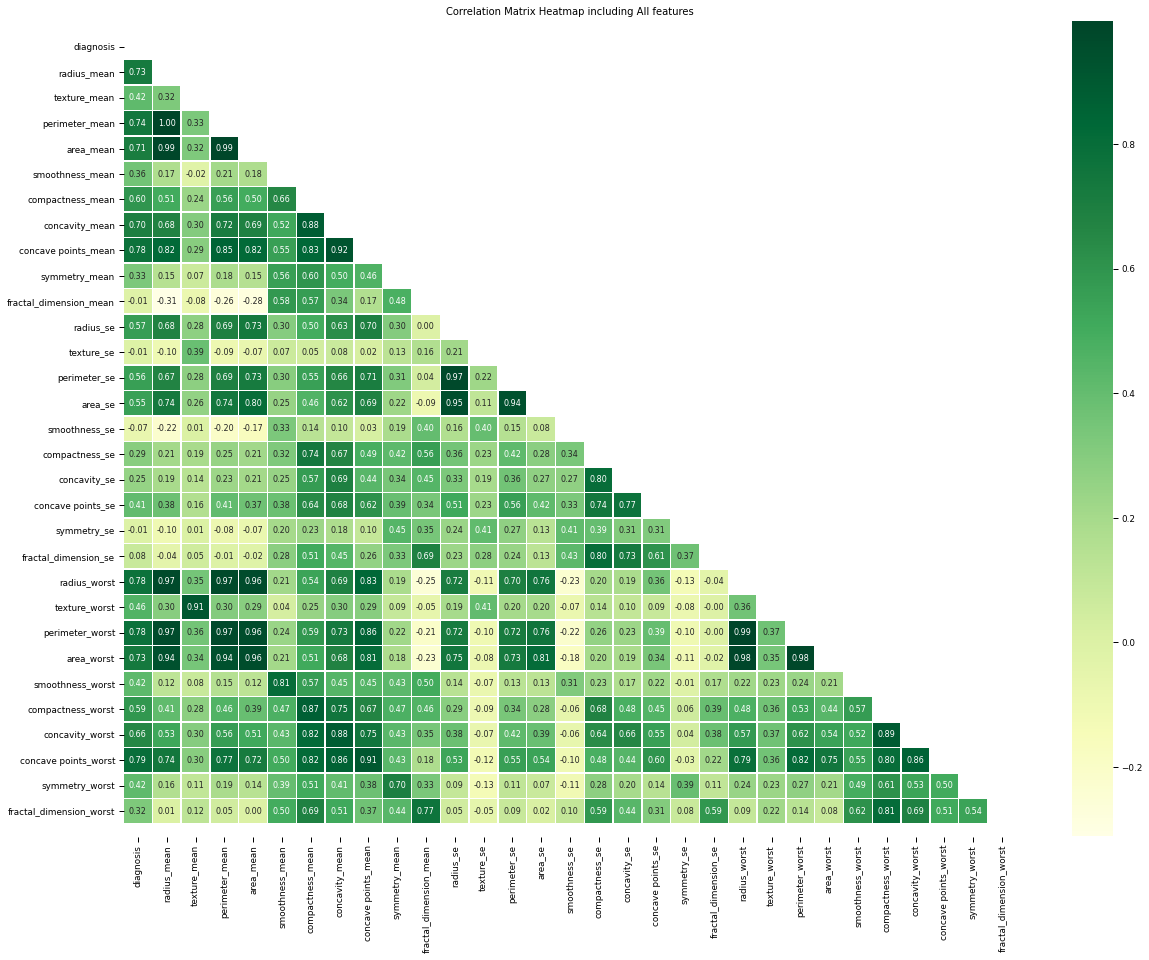

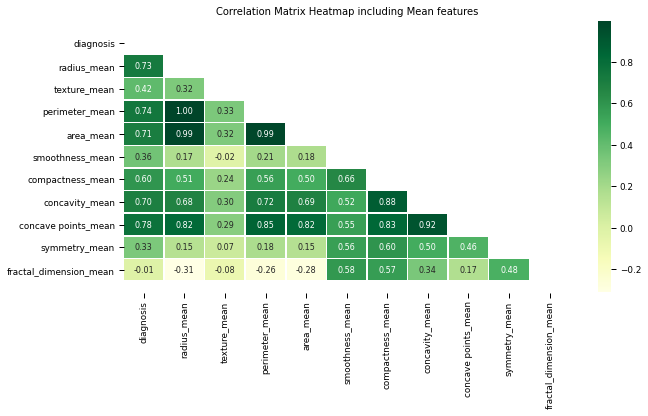

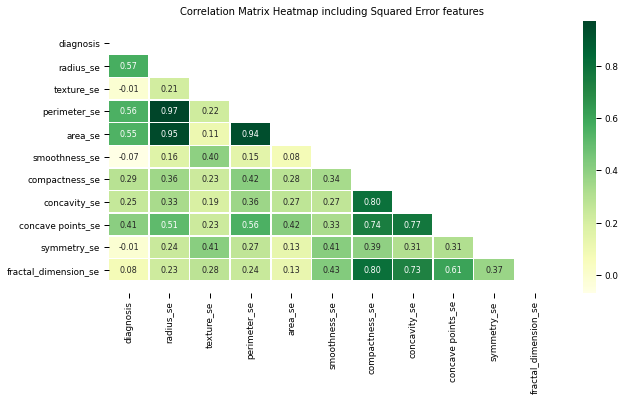

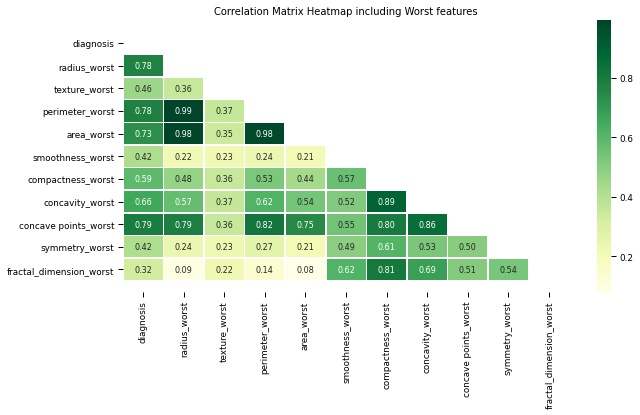

In [143]:
def corrheat(dfx):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    name = str([x for x in globals() if globals()[x] is dfx][0])
    if name == 'df':
        x = "All"
    elif name == 'df_mean':
        x = "Mean"
    elif name == 'df_se':
        x = "Squared Error"
    elif name == 'df_worst':
        x = "Worst"
    # Mask for Heatmap
    mask = np.zeros_like(dfx.corr(), dtype=np.bool)
    mask[np.triu_indices_from(dfx.corr())] = True
    # Correlation Matrix Heatmap including all features
    if name == "df":
        q,r =20, 15
    else:
        q,r = 10, 5
    fig, ax = plt.subplots(figsize=(q, r))
    ax = sns.heatmap(dfx.corr(), mask=mask, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGn");
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    ax.set_title("Correlation Matrix Heatmap including {} features".format(x), fontsize=10)
for i in df, df_mean, df_se, df_worst:
    corrheat(i)